In [1]:
import numpy as numpy
import pandas as pd
import indicators as idc
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px 
from plotly.subplots import make_subplots


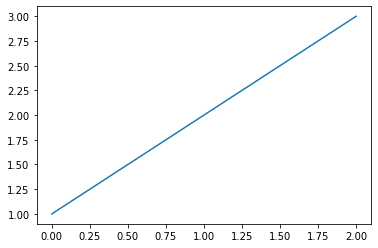

In [2]:
df = pd.read_csv('data/ASX_vs_Gold_vs_Silver.csv')
date_col = pd.to_datetime(df['Date'], dayfirst=True)
df['date'] = date_col.dt.date
df.set_index('date',inplace=True)
plt.plot([1,2,3])
plt.show()

In [3]:
df['Stock to Gold ratio'] = df['Close']/df['Gold AUD']
df['Stock to Silver ratio'] = df['Close']/df['Silver AUD']

# 

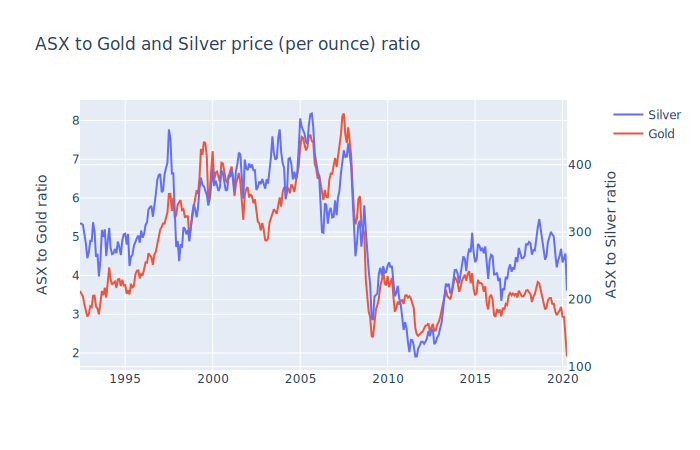

In [4]:
ratios_fig = make_subplots(specs=[[{"secondary_y": True}]])
ratios_fig.add_trace(go.Scatter(x=df.index, y=df['Stock to Silver ratio'],
                    mode='lines',
                    name='Silver'), secondary_y=True,)
ratios_fig.add_trace(
    go.Scatter(x=df.index, y=df['Stock to Gold ratio'],
                    mode='lines',
                    name='Gold'), secondary_y=False)
ratios_fig.update_yaxes(title_text="ASX to Gold ratio", secondary_y=False)
ratios_fig.update_yaxes(title_text="ASX to Silver ratio", secondary_y=True)
layout = go.Layout()
layout['title'] = 'ASX to Gold and Silver price (per ounce) ratio'
ratios_fig['layout'].update(layout)
ratios_fig.show("svg")

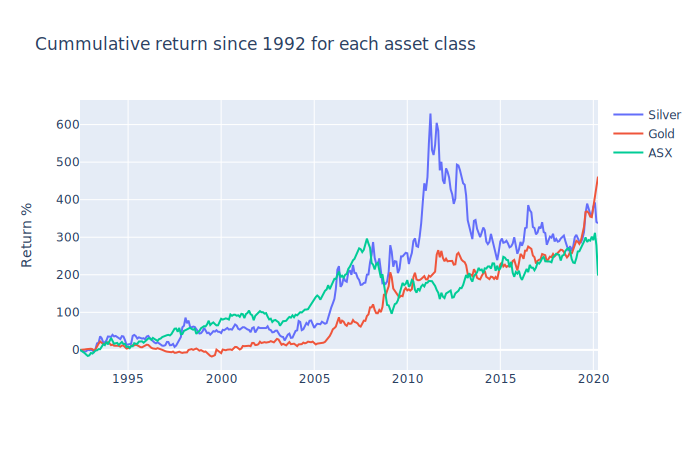

In [5]:
# Accummulative returns
silver_trace = go.Scatter(x=df.index, y=df['Silver Accum. Return %'], \
                    mode='lines',
                    name='Silver')
gold_trace = go.Scatter(x=df.index, y=df['Gold Accum. Return %'], \
                    mode='lines',
                    name='Gold')
asx_trace = go.Scatter(x=df.index, y=df['ASX accum. Return %'], \
                    mode='lines',
                    name='ASX')
traces = [silver_trace, gold_trace, asx_trace]
fig_accum_r = go.Figure(data=traces,
    layout={
        'title':'Cummulative return since 1992 for each asset class', "yaxis_title": "Return %"
    }
)
fig_accum_r.show("svg")

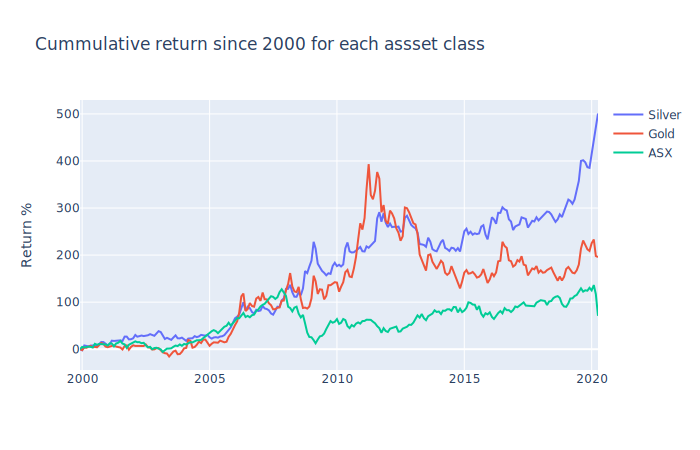

In [6]:
dfs = df[90:]
dfs['2000 acc return ASX'] = (dfs['Close'] - dfs['Close'][0])/dfs['Close'][0]*100
dfs['2000 acc return Silver'] = (dfs['Gold AUD'] - dfs['Gold AUD'][0]) /dfs['Gold AUD'][0]*100
dfs['2000 acc return Gold'] = (dfs['Silver AUD']-dfs['Silver AUD'][0])/dfs['Silver AUD'][0]*100
silver_trace = go.Scatter(x=dfs.index, y=dfs['2000 acc return Silver'], \
                    mode='lines',
                    name='Silver')
gold_trace = go.Scatter(x=dfs.index, y=dfs['2000 acc return Gold'], \
                    mode='lines',
                    name='Gold')
asx_trace = go.Scatter(x=dfs.index, y=dfs['2000 acc return ASX'], \
                    mode='lines',
                    name='ASX')
traces = [silver_trace, gold_trace, asx_trace]
fig_accum_r = go.Figure(data=traces,
    layout={
        'title':'Cummulative return since 2000 for each assset class', "yaxis_title": "Return %"
    }
)
fig_accum_r.show("svg")


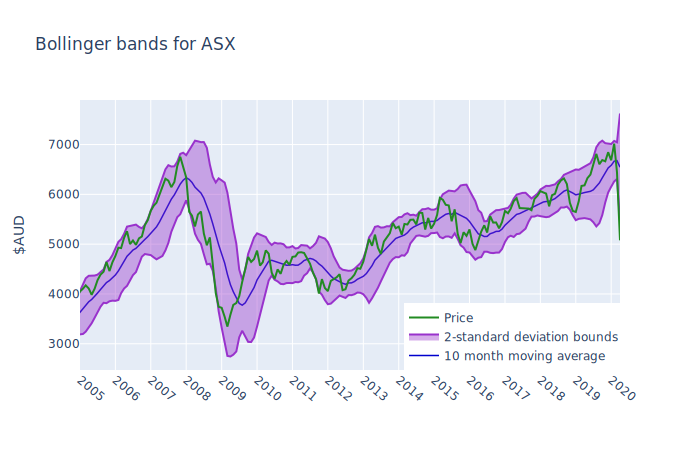

In [7]:
# ASX Bollinger
dfs = df[120:]
import indicators as idc
bbp = idc.get_sma(dfs['Close'],lookback=10)
bb_upper = idc.get_bb_upper(dfs['Close'],lookback=10)
bb_lower = idc.get_bb_lower(dfs['Close'],lookback=10)
price_trace = go.Scatter(x=dfs[10:].index, y=dfs['Close'][10:], \
                    mode='lines',
                    name='Price', line = {'color':'forestgreen'})
bbp_trace = go.Scatter(x=bbp.index, y=bbp, \
                    mode='lines',
                    name='10 month moving average', line = {'color':'mediumblue','width':1.5})
bb_upper_trace = go.Scatter(x=bbp.index, y=bb_upper, \
                    mode='lines',
                    name='2-standard deviation bounds',fill='tonexty', fillcolor= 'rgba(153,50, 204, 0.4)',line = {'color':'darkorchid'})
bb_lower_trace = go.Scatter(x=bbp.index, y=bb_lower, \
                    mode='lines',
                    name='', line = {'color':'darkorchid'},showlegend=False)
traces = [  bbp_trace,bb_lower_trace, bb_upper_trace,price_trace]
fig_accum_r = go.Figure(data=traces,
    layout={
        'title':'Bollinger bands for ASX', "yaxis_title": "$AUD",
        'xaxis': {'range':['2005-01-01','2020-04-01'], 'nticks':20, 'tickangle':40},
        'legend': {'x':0.6,'y':0}
    }
)
fig_accum_r.show("svg")

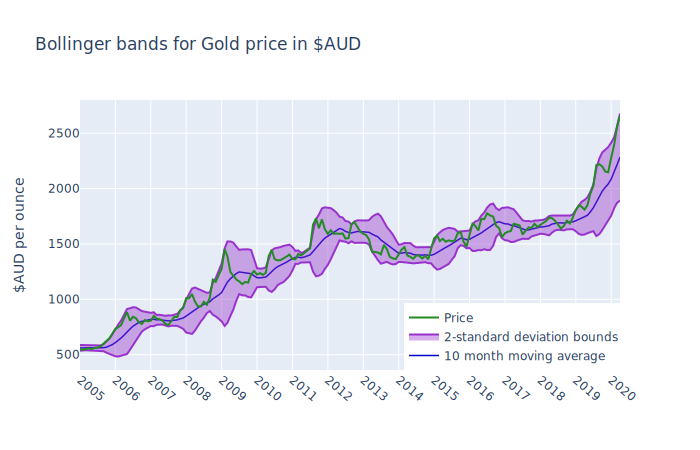

In [8]:
# Gold Bollinger
dfs = df[120:]
import indicators as idc
bbp = idc.get_sma(dfs['Gold AUD'],lookback=10)
bb_upper = idc.get_bb_upper(dfs['Gold AUD'],lookback=10)
bb_lower = idc.get_bb_lower(dfs['Gold AUD'],lookback=10)
price_trace = go.Scatter(x=dfs[10:].index, y=dfs['Gold AUD'][10:], \
                    mode='lines',
                    name='Price', line = {'color':'forestgreen'})
bbp_trace = go.Scatter(x=bbp.index, y=bbp, \
                    mode='lines',
                    name='10 month moving average', line = {'color':'mediumblue','width':1.5})
bb_upper_trace = go.Scatter(x=bbp.index, y=bb_upper, \
                    mode='lines',
                    name='2-standard deviation bounds',fill='tonexty', fillcolor= 'rgba(153,50, 204, 0.4)',line = {'color':'darkorchid'})
bb_lower_trace = go.Scatter(x=bbp.index, y=bb_lower, \
                    mode='lines',
                    name='', line = {'color':'darkorchid'},showlegend=False)
traces = [  bbp_trace,bb_lower_trace, bb_upper_trace,price_trace]
fig_accum_r = go.Figure(data=traces,
    layout={
        'title':'Bollinger bands for Gold price in $AUD', "yaxis_title": "$AUD per ounce",
        'xaxis': {'range':['2005-01-01','2020-04-01'],  'nticks':20, 'tickangle':40},
        'legend': {'x':0.6,'y':0}
    }
)
fig_accum_r.show("svg")

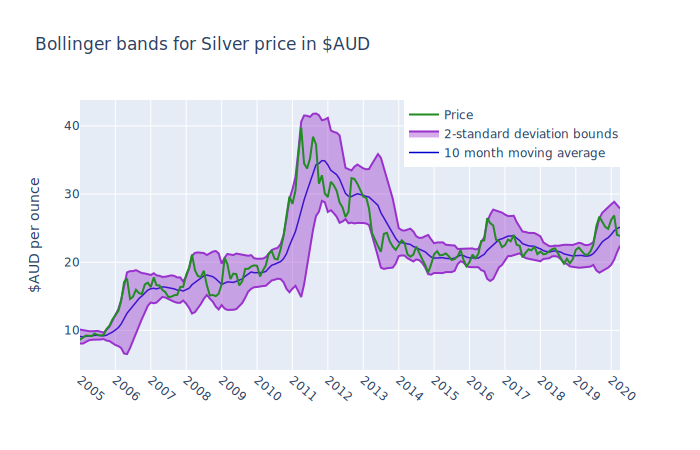

In [9]:
# Silver Bollinger
dfs = df[120:]
import indicators as idc
bbp = idc.get_sma(dfs['Silver AUD'],lookback=10)
bb_upper = idc.get_bb_upper(dfs['Silver AUD'],lookback=10)
bb_lower = idc.get_bb_lower(dfs['Silver AUD'],lookback=10)
price_trace = go.Scatter(x=dfs[10:].index, y=dfs['Silver AUD'][10:], \
                    mode='lines',
                    name='Price', line = {'color':'forestgreen'})
bbp_trace = go.Scatter(x=bbp.index, y=bbp, \
                    mode='lines',
                    name='10 month moving average', line = {'color':'mediumblue','width':1.5})
bb_upper_trace = go.Scatter(x=bbp.index, y=bb_upper, \
                    mode='lines',
                    name='2-standard deviation bounds',fill='tonexty', fillcolor= 'rgba(153,50, 204, 0.4)',line = {'color':'darkorchid'})
bb_lower_trace = go.Scatter(x=bbp.index, y=bb_lower, \
                    mode='lines',
                    name='', line = {'color':'darkorchid'},showlegend=False)
traces = [  bbp_trace,bb_lower_trace, bb_upper_trace,price_trace]
fig_accum_r = go.Figure(data=traces,
    layout={
        'title':'Bollinger bands for Silver price in $AUD', "yaxis_title": "$AUD per ounce",
        'xaxis': {'range':['2005-01-01','2020-04-01'],  'nticks':20, 'tickangle':40},
        'legend': {'x':0.6,'y':1}
    }
)
fig_accum_r.show("svg")

In [10]:
'''
labels = ['ASX to Silver ratio','ASX to Gold ratio']
annotations = []
a = dict(
    x='1983', y=5, xanchor='left', yanchor='middle',
    text = 'Stock to Silver', showarrow = False)
annotations.append(a)
layout = go.Layout()
layout['annotations'] = annotations
fig1 = make_subplots(specs=[[{"secondary_y": True}]])
fig1['layout'].update(layout)
'''

'\nlabels = [\'ASX to Silver ratio\',\'ASX to Gold ratio\']\nannotations = []\na = dict(\n    x=\'1983\', y=5, xanchor=\'left\', yanchor=\'middle\',\n    text = \'Stock to Silver\', showarrow = False)\nannotations.append(a)\nlayout = go.Layout()\nlayout[\'annotations\'] = annotations\nfig1 = make_subplots(specs=[[{"secondary_y": True}]])\nfig1[\'layout\'].update(layout)\n'